<ipython-input-2-c86a8b8488cf>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_price = df['Price'].resample('M').mean().dropna()


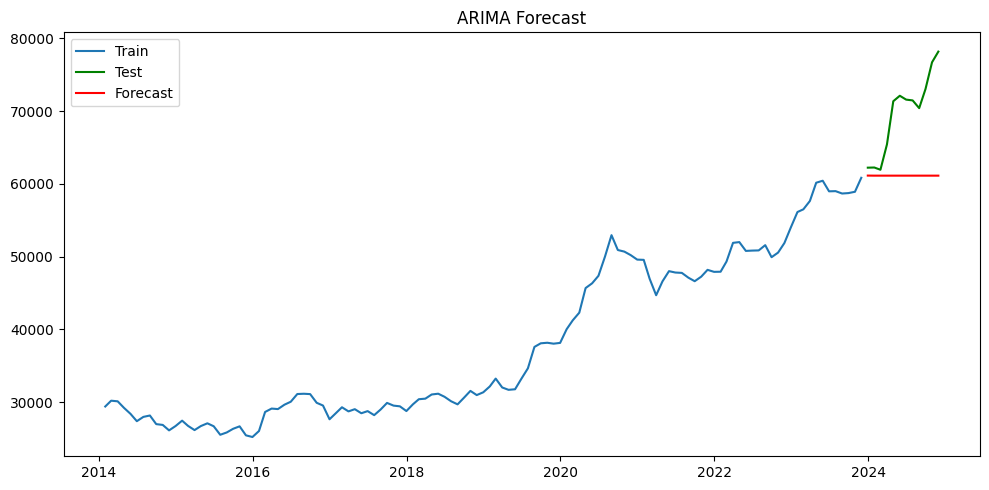

RMSE: 10104.63


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import mean_squared_error
import numpy as np

register_matplotlib_converters()

# Load and prepare data
df = pd.read_csv("Gold_Price_DataSet.csv", parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)
df['Price'] = df['Price'].interpolate()

# Resample to monthly average
monthly_price = df['Price'].resample('M').mean().dropna()

# Split into train and test
train = monthly_price[:-12]
test = monthly_price[-12:]

# Fit ARIMA model (ARIMA(p,d,q) - here we choose (1,1,1) as a simple start)
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)
forecast.index = test.index

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='green')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.tight_layout()
plt.show()

# Evaluate
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.2f}")
